1. Load the Data Set

In [24]:
import pandas as pd
# Load the uploaded CSV
from google.colab import files
uploaded = files.upload("")

Saving insurance.csv to insurance (2).csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df = pd.read_csv("insurance.csv") # Write the exact file name
df.head() # Shows first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2. Quick Data Inspection

In [26]:
# Check shape (rows x columns)
print("Shape:", df.shape)

# Check data types and missing values
df.info()

# Summary statistics for numerical columns
df.describe()


Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


3. Check for Missing Values

In [27]:
# Count missing values per column
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


4. Start Exploratory Data Anlysis (EDA)

A. Distribution of Numerical Columns

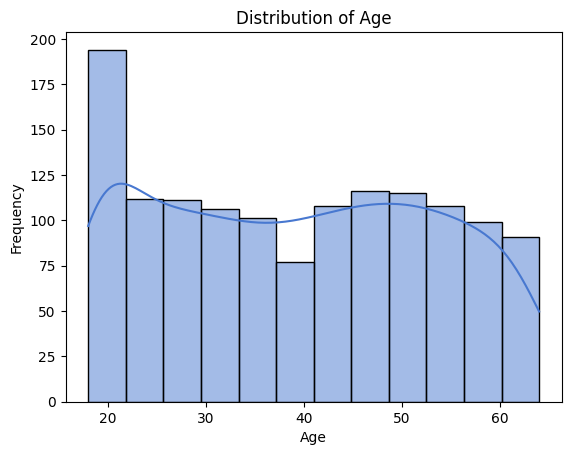

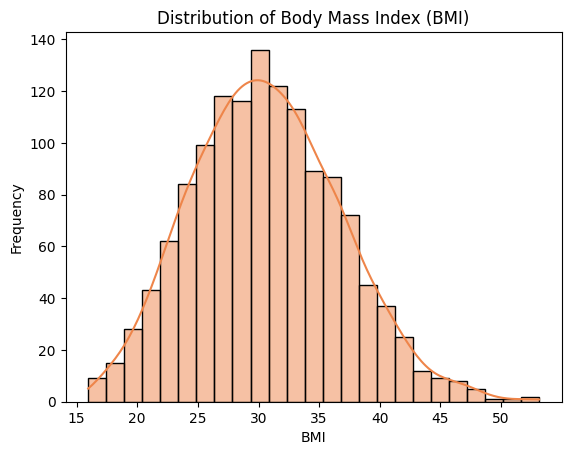

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette('muted')
# Histogram for age
sns.histplot(df['age'], kde=True, color=palette[0])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Histogram for BMI
sns.histplot(df['bmi'], kde=True, color=palette[1])
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


Interpretation: Most individuals are aged between 18 and 40, with fewer older participants. This suggests the dataset is skewed toward younger adults, which may influence insurance charges.

BMI values are roughly normally distributed, with most individuals between 25 and 35. A few individuals have very high BMI, which could impact insurance costs.

B. Compare Categorical Columns vs Charges

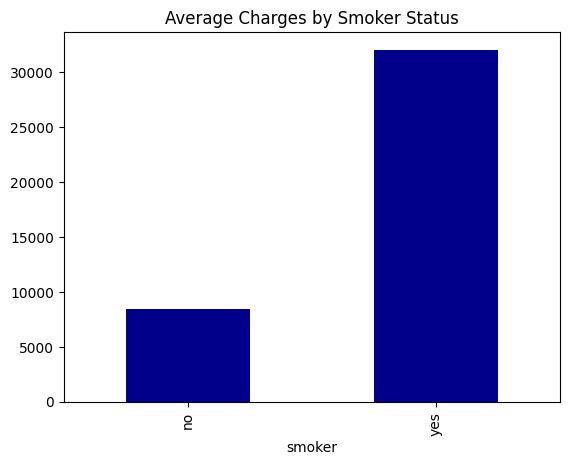

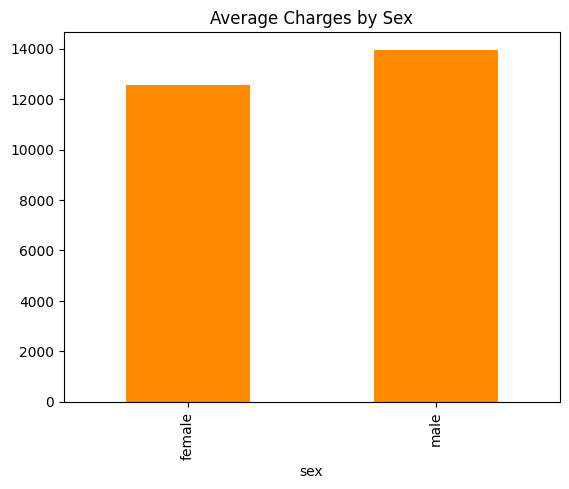

In [87]:
# Average charges by smoker
df.groupby('smoker')['charges'].mean().plot(
    kind='bar',
    color='darkblue'
)

plt.title('Average Charges by Smoker Status')
plt.show()

# Average charges by sex
df.groupby('sex')['charges'].mean().plot(
    kind='bar',
    color='darkorange'
)

plt.title('Average Charges by Sex')
plt.show()

Interpretation: Smokers have substantially higher average insurance charges than non-smokers.
This suggests that smoking is a major factor driving up insurance costs, consistent with expectations.

The average insurance charges for males and females are relatively similar,
indicating that sex has a smaller impact on charges compared to smoking status.

C. Correlation Between Numerical Columns

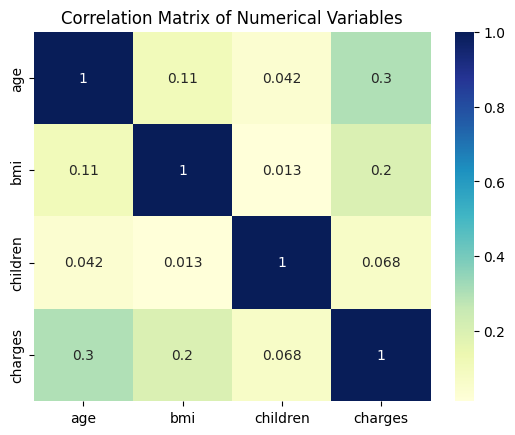

In [74]:
# Select numeric columns only
df_numeric = df.select_dtypes(include='number')

# Correlation matrix
corr = df_numeric.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Interpretation: The correlation matrix shows the relationships between numerical variables in the dataset.

- **Charges** are strongly positively correlated with **age** and moderately correlated with **BMI**, indicating that older individuals and those with higher BMI tend to have higher insurance costs.  
- Other variables, such as the number of children, show little to no correlation with charges.  

This analysis helps identify key factors influencing insurance costs and guides further investigation.

5. Statistical Hypothesis Testing

Objective: To determine whether smoking status has a statistically significant effect on insurance charges.

Hypotheses:
- **H₀ (Null hypothesis):** There is no difference in average insurance charges between smokers and non-smokers.
- **H₁ (Alternative hypothesis):** Smokers have higher average insurance charges than non-smokers.

Methodology:
An independent two-sample t-test was used to compare the mean insurance charges between smokers and non-smokers. The two groups are independent, and insurance charges are a continuous variable, making this test appropriate.

In [90]:
from scipy.stats import ttest_ind

# Split the data into two groups
smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']

# Perform independent t-test
t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 32.751887766341824
P-value: 5.88946444671698e-103


Interpretation: The t-test shows a t-statistic of 32.75 and a p-value effectively equal to 0. This indicates a **highly statistically significant difference** in mean insurance charges between smokers and non-smokers.

In other words, smokers incur substantially higher insurance charges than non-smokers.

Business Insight: Smoking status is a major driver of insurance costs. Insurers may use this insight for risk-based pricing, policy design, or preventive health programs.